# Desafio

- Neste projeto, vamos estudar, através dos dados de obtenção de patentes fornecido pela Sirius, o tempo estimado necessário para obtenção da concessão de patentes, tendo como principais parâmetros o ecossistema em que a patente foi aplicada e a quantidade de classes que esta pertence.

- Nos interessamos por este estudo porque essa informação pode ser altamente estratégica e relevante para empresas e marcas que estão interessadas em prever esse tempo para obtenção de uma patente e com isso adquirirem maior previsibilidade de quando irão lançar um novo produto no mercado, um novo processo industrial para aprimoramento de um produto já existente, etc.

# Quais os dados?


A principal fonte de dados que trabalhamos foi o arquivo em csv "raw_patents.csv", que contém todas as informações necessárias para a condução da análise, que é melhor exemplificada abaixo.


In [ ]:
#Fazendo a importação da base de dados

import pandas as pd
raw = pd.read_csv('raw_patents.csv')

In [ ]:
df_patentes = raw

In [ ]:
# A partir da data de aplicação da patente(app_date) e da data de concessão da patente(grant_date) conseguimos chegar na variável "time_to grant", basicamente o tempo que levou para a aprovação da patente.
df_patentes['grant_date'] = pd.to_datetime(df_patentes['grant_date'])
df_patentes['app_date'] = pd.to_datetime(df_patentes['app_date'])
df_patentes['time_to_grant'] = (df_patentes['grant_date'] - df_patentes['app_date']).dt.days


In [ ]:
# Após obter a variável em dias, fizemos um ajuste para obteros a variável em anos e não mais em dias.
df_patentes['time_to_grant_years'] = (df_patentes['time_to_grant']) /365

In [ ]:
df_patentes["time_to_grant_years"].describe()

count    9.830924e+06
mean     1.036422e+00
std      7.637988e-01
min      2.082192e-01
25%      4.493151e-01
50%      6.027397e-01
75%      1.515068e+00
max      9.805479e+00
Name: time_to_grant_years, dtype: float64

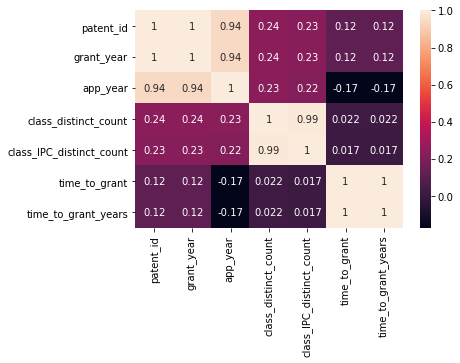

In [ ]:
import seaborn as sns
sns.heatmap(df_patentes.corr(), annot=True);

In [ ]:
df_patentes.corr()["time_to_grant"].sort_values()

app_year                   -0.173098
class_IPC_distinct_count    0.017222
class_distinct_count        0.021639
grant_year                  0.118542
patent_id                   0.118650
time_to_grant_years         1.000000
time_to_grant               1.000000
Name: time_to_grant, dtype: float64

In [ ]:
df_patentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9830924 entries, 0 to 9830923
Data columns (total 19 columns):
 #   Column                    Dtype              
---  ------                    -----              
 0   patent_id                 int64              
 1   name_first                object             
 2   name_last                 object             
 3   city                      object             
 4   country                   object             
 5   grant_date                datetime64[ns, UTC]
 6   grant_year                int64              
 7   app_date                  datetime64[ns, UTC]
 8   app_year                  int64              
 9   class_distinct_count      float64            
 10  class_concat              object             
 11  class_IPC_distinct_count  float64            
 12  class_IPC_concat          object             
 13  CountryName               object             
 14  CityCountry               object             
 15  Ecosystem      

Como é possível ver no resultado do código acima, nosso dataset é composto de mais de 9 milhões de linhas. Por conta da magnitude do dataset, precisaremos realizar tratamentos no mesmo para tornar viável a condução dos estudos de machine learning no material.

In [ ]:
# O primeiro passo para a simplificação do dataset foi recortar e usar apenas as colunas que eram importantes para a análise

novo_df = df_patentes[['Ecosystem','class_IPC_distinct_count','time_to_grant_years']]

In [ ]:
# O primeiro passo para a simplificação do dataset foi recortar e usar apenas as colunas que eram importantes para a análise

novo_df = df_patentes[['Ecosystem','class_IPC_distinct_count','time_to_grant_years']]

# O segundo passo foi "embaralhar" nossos dados, isto é, garantir que não existia nenhum tipo de viés ou classificação dentro das colunas utilizadas, para evitar erros nos passos seguintes
novo_df_sample = novo_df.sample(frac=1).reset_index(drop=True)

# o terceiro passo foi retirar todas as linhas que possuem valores nulos.
novo_df_sample = novo_df_sample.dropna()

# o quarto passo foi realizar o fracionamento da base para termos uma amostragem menor que possibilite o estudo dos modelos de ML.
novo_df_sample = novo_df_sample.sample(frac=0.1)

In [ ]:
# O segundo passo foi "embaralhar" nossos dados, isto é, garantir que não existia nenhum tipo de viés ou classificação dentro das colunas utilizadas, para evitar erros nos passos seguintes
novo_df_sample = novo_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# o terceiro passo foi retirar todas as linhas que possuem valores nulos.
novo_df_sample = novo_df_sample.dropna()


In [ ]:
# o quarto passo foi realizar o fracionamento da base para termos uma amostragem menor que possibilite o estudo dos modelos de ML.
novo_df_sample = novo_df_sample.sample(frac=0.1)

<Figure size 1440x1440 with 0 Axes>

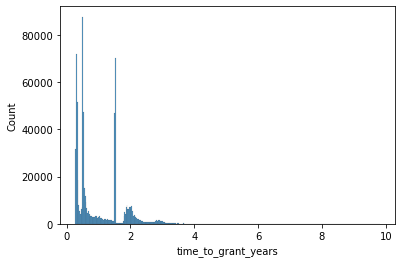

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# Uma vez realizado os ajustes acima, vamos dar uma olhada em como nossos dados estão distribuídos em relação ao tempo de concessão de patentes.
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(novo_df_sample['time_to_grant_years'])
plt.figure(figsize=(20, 20))


<Figure size 1440x1440 with 0 Axes>

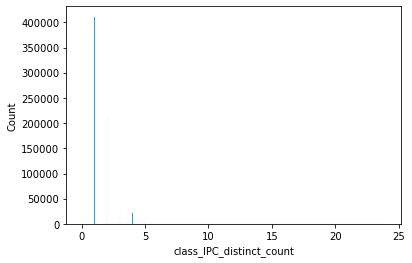

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# Uma vez realizado os ajustes acima, vamos dar uma olhada em como nossos dados estão distribuídos em relação à quantidade de classes que as patentes pertencem
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(novo_df_sample['class_IPC_distinct_count'])
plt.figure(figsize=(20, 20))

# Quais modelos de ML usados

Para resolver o desafio proposto, o grupo teve duas abordagens, uma atráves de algoritmos de regressão e uma através de algoritmos de classificação.

Em ambos os casos, usamos o OneHotEncoder para padronização de nossas variáveis .

Na abordagem de regressão usamos a Regressão de Ridge.
**Prós**:
1.   Redução de Overfitting: A regularização L2 ajuda a evitar o overfitting.
2.   Estabilidade dos Coeficientes: Produz estimativas de coeficientes mais estáveis em situações de multicolinearidade, onde variáveis independentes estão altamente correlacionadas.

**Contras**:
1.   Interpretação dos Coeficientes: Os coeficientes escolhidos podem ser mais difíceis de interpretar em comparação com a regressão linear simples, pois a penalização pode obscurecer a importância relativa das variáveis.

2.   Dependência da Escala das Variáveis: Os resultados podem ser sensíveis à escala das variáveis, exigindo uma normalização ou padronização prévia para garantir que todas as variáveis sejam tratadas de forma justa.

Na abordagem de classificação usamos o modelode Random Forest

**Prós**:
1.   Capacidade de lidar com grandes datasets: como o dataset que estamos usando possui um alto volume de dados, um modelo que seja robusto e otimizado para ter uma boa atuação neste contexto é essencial.
2.   Alta precisão: andom Forest geralmente oferece alta precisão devido ao efeito de ensemble, onde múltiplas árvores de decisão são usadas para a previsão final.

**Contras**:
1.   Complexidade e tempo de treinamento/ predição: em termos computacionais, a ferramenta é altamente intensiva e necessita de mais tempo para treinar o modelo e predizer o resultado final.
2.   Armazenamento e memória: em linha com o ponto contra acima, O modelo Random Forest pode exigir uma quantidade significativa de memória para armazenar todas as árvores, especialmente se o número de árvores for grande e os dados forem volumosos. .




In [ ]:
# Realizando a importação das bibliotecas necessárias para a condução da análise
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Criando as variáveis de estudo
X = novo_df_sample[['Ecosystem', 'class_IPC_distinct_count']]
y = novo_df_sample['time_to_grant_years']

# Codificar variáveis categóricas
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Criar e treinar o modelo
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Prever o tempo de concessão
predictions = model.predict(X_test)
print(predictions)




[1.04905806 1.07638022 0.91594594 ... 1.1224621  0.89768013 1.28884807]


In [ ]:
# Criando uma função para obtermos os principais indicadores de qualidade de um modelo de regressão de Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics
def calculando_metricas(predicao, real):
    print("R2 do modelo = {}".format(metrics.r2_score(real,predicao).round(4)))
    print("MAE do modelo = {}".format(metrics.mean_absolute_error(real,predicao).round(4)))
    print("MSE do modelo = {}".format(metrics.mean_squared_error(real,predicao).round(4)))

In [ ]:
calculando_metricas(predictions, y_test)


R2 do modelo = 0.0467
MAE do modelo = 0.6305
MSE do modelo = 0.5524


## Realizado o estudo de regressão, agora iremos para a abordagem de classificação

In [ ]:
# Inicialmente é necessário realizar a criação dos parâmetros para a função cut que irá realizar a classificação da coluna de "time_to_grant_years"
bins = [0, 1, 2, 3, float('inf')]
labels = ["Menos de 1 ano", "Entre 1 e 2 anos", "Entre 2 e 3 anos", "Mais que 3 anos"]


In [ ]:
# Criando a coluna de classficação do tempo de concessão das patentes
novo_df_sample['time_to_grant_years_classification']= pd.cut(df_patentes["time_to_grant_years"], bins=bins, labels=labels)

In [ ]:
novo_df_sample = novo_df_sample[['Ecosystem','class_IPC_distinct_count','time_to_grant_years_classification']]

In [ ]:
# Criando as variáveis de estudo
X = novo_df_sample[['Ecosystem', 'class_IPC_distinct_count']]
y = novo_df_sample['time_to_grant_years_classification']

# Codificar variáveis categóricas
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [ ]:
# Aplicando o modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100, min_samples_leaf=2)
modelo.fit(X_train, y_train) #ajuste do modelo

RandomForestClassifier(min_samples_leaf=2)

In [ ]:
predicao_modelo = modelo.predict(X_test)

In [ ]:
# Realizando o estudo da acurácia para apurar os resultados do estudo de classificação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, predicao_modelo)
print("Acurácia:", accuracy)

Acurácia: 0.5852671108973918


# Jornada / Conclusão

- Após realizar o estudo de Regressão e Classificação, foi possível constatar que não conseguimos ter um modelo com um nível de performance satisfatória. Isso pode estar ligado ao fato do dataset não ter uma distribuição normal das variáveis utilizadas no modelo, o que acabou fazendo com que criássemos modelos enviesados e com baixa aplicabilidade.

- Com mais tempo, o grupo concorda que estudar maneiras de adquirir ou tratar o dataset para termos os dados com uma distribuição mais próxima da normal seria essencial para um melhor ajuste dos modelos.

- Além disso, o estudo com outras variáveis pode ser interessante para entender se deixamos passar alguma outra coluna que possa ser importante para a construção de um modelo capaz de predizer o tempo para obtenção de uma patente.

- Por fim, foi conduzida uma análise em paralelo com o objetivo de prever a quantidade de patentes que serão concedidas nos próximos anos em cada ecossistema. Esse estudo pode ser muito útil para acompanharmos as taxas de crescimento na obtenção de patentes que destacamos nos últimos módulos de DataViz e SQL.

Código que determina a quantidade de patentes futuras num range de datas determinado

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Agrupar dados por ecossistema e ano
data_grouped = df_patentes.groupby(['Ecosystem', 'grant_year']).size().reset_index(name='counts')

# Convert 'Ecosystem' to numerical using one-hot encoding
X = pd.get_dummies(data_grouped[['Ecosystem', 'grant_year']], columns=['Ecosystem'], drop_first=True)
y = data_grouped['counts']

# Ensure all columns in X are numeric
X = X.astype(float) # Convert all columns to float type

# Adicionar constante para o modelo OLS
X = sm.add_constant(X)

# Criar e ajustar o modelo OLS
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     70.03
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:22:49   Log-Likelihood:                -57938.
No. Observations:                6650   AIC:                         1.177e+05
Df Residuals:                    5751   BIC:                         1.238e+05
Df Model:                         898                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [ ]:
# Definir os anos futuros para previsão
future_years = list(range(2022, 2027))

# Criar um DataFrame com os anos futuros e o ecossistema de interesse
future_data = pd.DataFrame({'grant_year': future_years, 'Ecosystem': ['Silicon Valley'] * len(future_years)})

# Codificar a variável 'Ecosystem' usando as mesmas colunas do treino
# Obter as colunas de ecossistema usadas no treinamento
ecosystem_columns = [col for col in X.columns if 'Ecosystem' in col]
future_data = pd.get_dummies(future_data, columns=['Ecosystem'])
# Adicionar colunas faltantes e preenchê-las com 0
for col in ecosystem_columns:
    if col not in future_data.columns:
        future_data[col] = 0

# Adicionar a constante à matriz de recursos para previsão ANTES de reordenar as colunas
future_data = sm.add_constant(future_data)

# Reordenar as colunas para corresponder à ordem do modelo
future_data = future_data[['const', 'grant_year'] + ecosystem_columns]

# Fazer a previsão
future_predictions = model.predict(future_data)

# Exibir as previsões
for year, prediction in zip(future_years, future_predictions):
    print(f"Previsão de patentes para {year}: {prediction:.2f}")